In [1]:
# import talib
import numpy as np
# import pandas as pd
from backtesting_mom.signals2 import params_long, compute_signals_long
from backtesting.utils_compact import compact_all_medians, compact_best_medians
import warnings
warnings.simplefilter('ignore')

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


In [2]:
interval = '1h'
direction = 'long'
symbols = [
    "BTCUSDT",
    "ETHUSDT",
    "XRPUSDT",
    "SOLUSDT",
    "BNBUSDT",
    "DOGEUSDT",
    "ADAUSDT",
    "LINKUSDT",
    "AVAXUSDT",
    "SUIUSDT",
    "SHIBUSDT",
    "LTCUSDT",
    "HBARUSDT",
    "RENDERUSDT",
    "UNIUSDT",
]

In [3]:
params = params_long()
print(params.keys())

Number of permutations params_long: 324
dict_keys(['adx_p', 'adx_low', 'adx_high'])


In [4]:
medians_df, ohlc_dict, count_bars = compact_all_medians(
    symbols,
    interval,
    params,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby

Start computing signals for SOLUSDT
Start computing signals for BNBUSDT
Start computing signals for ETHUSDT
Start computing signals for BTCUSDT
Start computing signals for ADAUSDT
Start computing signals for LTCUSDT
Start computing signals for RENDERUSDT
Start computing signals for DOGEUSDT
Start computing signals for SUIUSDT
Start computing signals for SHIBUSDT
Start computing signals for XRPUSDT
Start computing signals for UNIUSDT
Start computing signals for LINKUSDT
Start computing signals for AVAXUSDT
Start computing signals for HBARUSDT
End computing signals for RENDERUSDT
End computing signals for LTCUSDT
End computing signals for ETHUSDT
End computing signals for SHIBUSDT
End computing signals for AVAXUSDT
End computing signals for SOLUSDT
End computing signals for XRPUSDT
End computing signals for LINKUSDT
End computing signals for ADAUSDT
End computing signals for HBARUSDT
End computing signals for BNBUSDT
End computing signals for SUIUSDT
End computing signals for BTCUSDT
End

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby

Start computing portfolio metrics for BNBUSDT
Start computing portfolio metrics for AVAXUSDT
Start computing portfolio metrics for SOLUSDT
Start computing portfolio metrics for ADAUSDT
Start computing portfolio metrics for LINKUSDT
Start computing portfolio metrics for ETHUSDT
Start computing portfolio metrics for DOGEUSDT
Start computing portfolio metrics for BTCUSDT
Start computing portfolio metrics for XRPUSDT
Start computing portfolio metrics for SUIUSDT
Start computing portfolio metrics for SHIBUSDT
Start computing portfolio metrics for RENDERUSDT
Start computing portfolio metrics for HBARUSDT
Start computing portfolio metrics for LTCUSDT
Start computing portfolio metrics for UNIUSDT
End computing portfolio metrics for RENDERUSDT
End computing portfolio metrics for BTCUSDT
End computing portfolio metrics for SOLUSDT
End computing portfolio metrics for SUIUSDT
End computing portfolio metrics for ADAUSDT
End computing portfolio metrics for DOGEUSDT
End computing portfolio metrics fo

In [5]:
print(count_bars)

8784


In [6]:
joined_long_df = medians_df.copy()
joined_long_df = joined_long_df.replace([np.inf, -np.inf], np.nan)
joined_long_df = joined_long_df.dropna()
# remove with negative total return
# joined_long_df = joined_long_df[joined_long_df['total_return'] > 0]
# joined_long_df = joined_long_df[joined_long_df > joined_long_df.quantile(0.45)]
joined_long_df = joined_long_df.dropna()
print(joined_long_df.describe())
# joined_long_df.sort_values(by='win_rate', ascending=False)
# joined_long_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_long_df = joined_long_df.sort_values(by='expectancy', ascending=False).head(55)
joined_long_df.head(8)

       total_return    win_rate       count  profit_factor  max_drawdown  \
count    315.000000  315.000000  315.000000     315.000000    315.000000   
mean      -0.096228    0.541333   37.158730       0.490778     -0.109283   
std        0.024562    0.023977    9.539069       0.048564      0.024444   
min       -0.136920    0.482759   17.000000       0.379619     -0.150653   
25%       -0.113319    0.523810   29.000000       0.456848     -0.126650   
50%       -0.098584    0.545455   41.000000       0.493488     -0.115581   
75%       -0.079248    0.557692   45.000000       0.522675     -0.090489   
max       -0.022294    0.625000   52.000000       0.687135     -0.048010   

       expectancy  
count  315.000000  
mean    -2.681991  
std      0.371322  
min     -3.625779  
25%     -2.934729  
50%     -2.641194  
75%     -2.429593  
max     -1.393352  


total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
20         26           32                -0.022294  0.625000   18.0   
                        28                -0.022294  0.625000   18.0   
                        34                -0.022294  0.625000   18.0   
                        30                -0.022294  0.625000   18.0   
                        36                -0.022294  0.625000   18.0   
22         20           30                -0.073431  0.580645   30.0   
                        28                -0.073431  0.580645   30.0   
                        26                -0.073431  0.580645   30.0   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
20         26           32                  0.687135     -0.048010   -1.393352  
                        28                  0.687135     -0.048010   -1.393352  
                        34                  0.687135     -0.048010   -1.393352  
                        30                  0.687135     -0.048010   -1.393352  
                        36                  0.687135     -0.048010   -1.393352  
22         20           30                  0.571274     -0.086865   -2.093293  
                        28                  0.571274     -0.086865   -2.093293  
                        26                  0.571274     -0.086865   -2.093293

In [7]:
dfc = joined_long_df.copy()
joined_best_orig_df, pf_dict = compact_best_medians(
    dfc,
    symbols,
    ohlc_dict,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby

Start computing signals for BNBUSDT
Start computing signals for LTCUSDT
Start computing signals for XRPUSDT
Start computing signals for UNIUSDT
Start computing signals for RENDERUSDT
Start computing signals for BTCUSDT
Start computing signals for LINKUSDT
Start computing signals for ETHUSDT
Start computing signals for SOLUSDT
Start computing signals for SUIUSDT
Start computing signals for HBARUSDT
Start computing signals for SHIBUSDT
Start computing signals for DOGEUSDT
Start computing signals for AVAXUSDT
Start computing signals for ADAUSDT
End computing signals for RENDERUSDT
End computing signals for LINKUSDT
End computing signals for AVAXUSDT
End computing signals for LTCUSDT
End computing signals for ETHUSDT
End computing signals for SHIBUSDT
End computing signals for XRPUSDT
End computing signals for ADAUSDT
End computing signals for SOLUSDT
End computing signals for DOGEUSDT
End computing signals for BTCUSDT
End computing signals for HBARUSDT
End computing signals for BNBUSDT
En

In [8]:
joined_best_df = joined_best_orig_df.copy()
# joined_df.sort_values(by='expectancy', ascending=False)
joined_best_df
joined_best_df = joined_best_df.replace([np.inf, -np.inf], np.nan)
joined_best_df = joined_best_df.dropna()
# joined_df = joined_df[joined_df > joined_df.quantile(0.35)]
joined_best_df = joined_best_df.dropna()
# # print(joined_df.describe())

# # drop multiindex and save to csv
# # joined_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_best_df = joined_best_df.sort_values(by='expectancy', ascending=False).head(5)
joined_best_df.head(4)

total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
20         26           28                -0.022294     0.625   18.0   
                        30                -0.022294     0.625   18.0   
                        34                -0.022294     0.625   18.0   
                        32                -0.022294     0.625   18.0   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
20         26           28                  0.687135      -0.04801   -1.393352  
                        30                  0.687135      -0.04801   -1.393352  
                        34                  0.687135      -0.04801   -1.393352  
                        32                  0.687135      -0.04801   -1.393352

#########################
BTCUSDT 47.83%


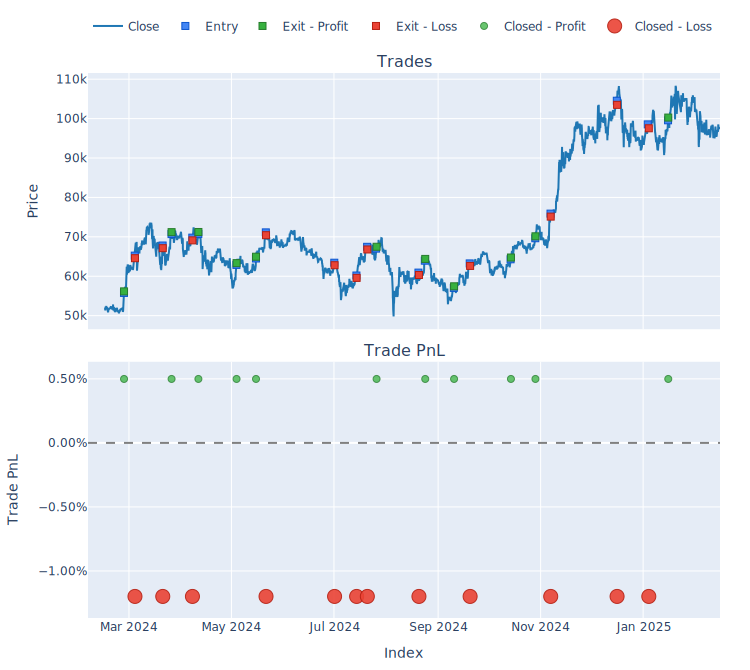

#########################
#########################
ETHUSDT 78.57%


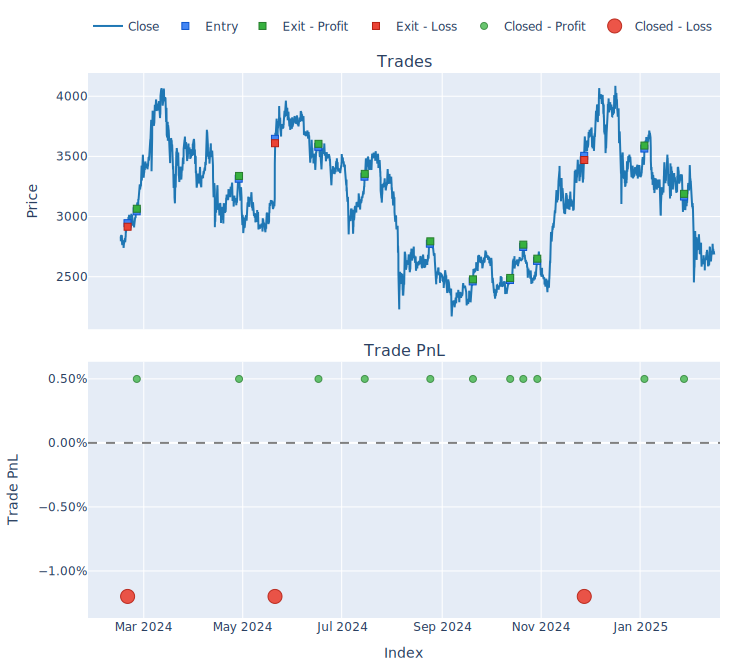

#########################
#########################
XRPUSDT 52.17%


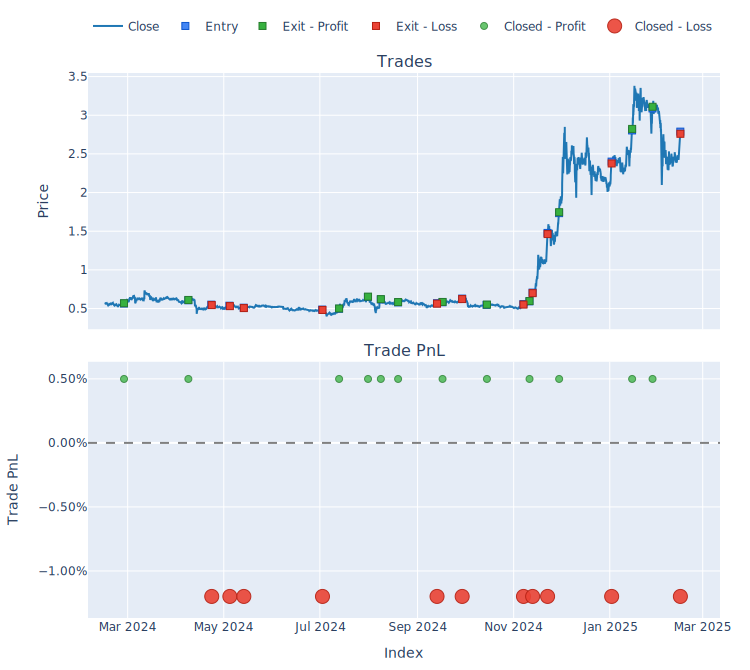

#########################
#########################
SOLUSDT 75.0%


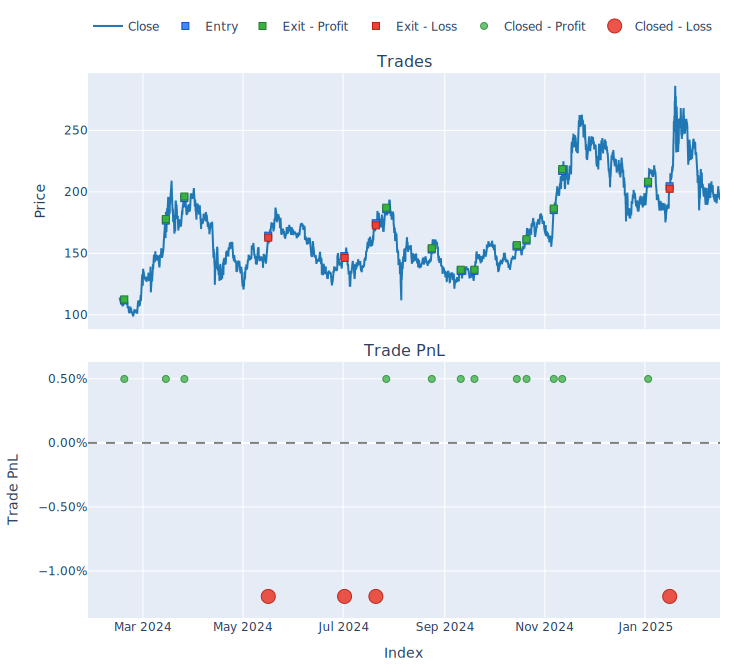

#########################
#########################
BNBUSDT 64.71%


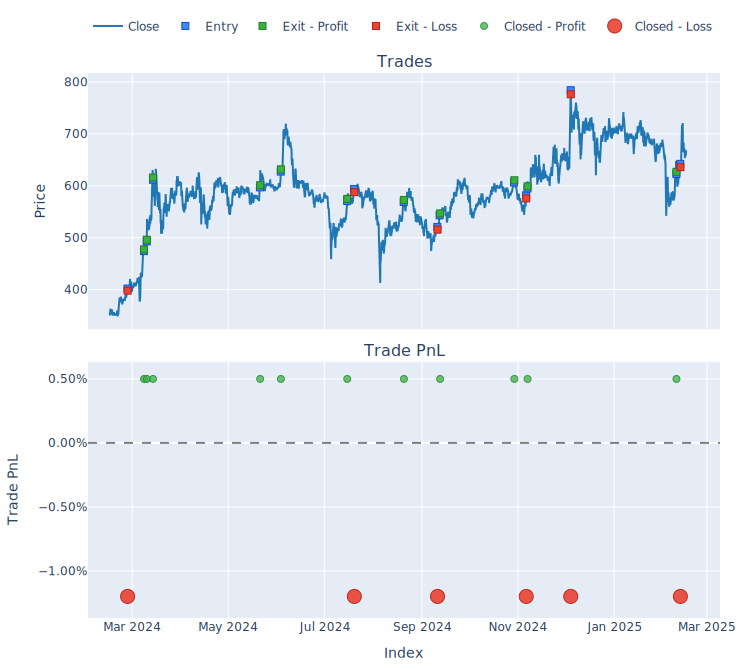

#########################
#########################
DOGEUSDT 34.48%


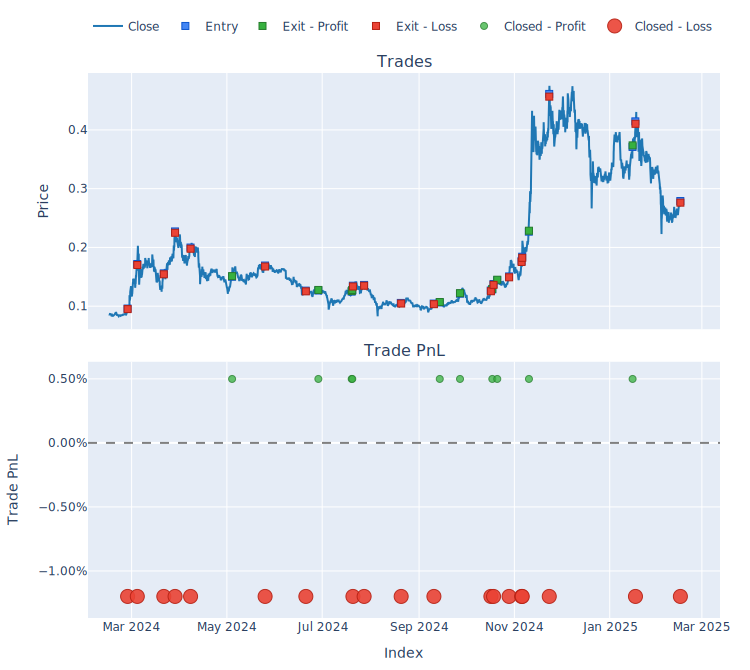

#########################
#########################
ADAUSDT 61.11%


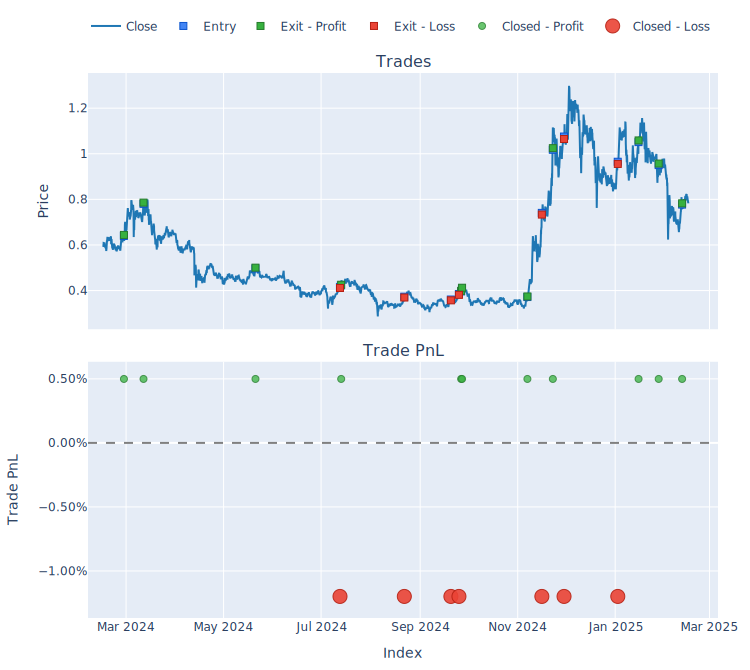

#########################
#########################
LINKUSDT 66.67%


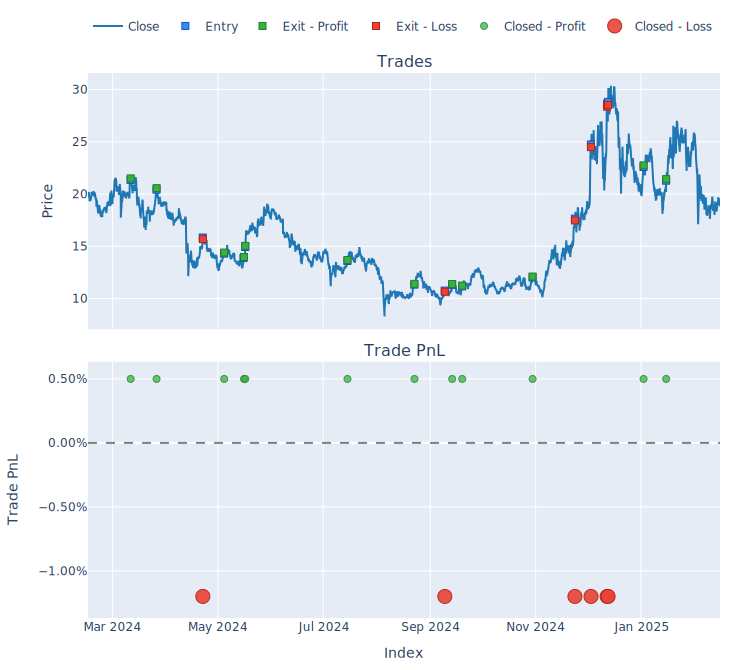

#########################
#########################
AVAXUSDT 43.48%


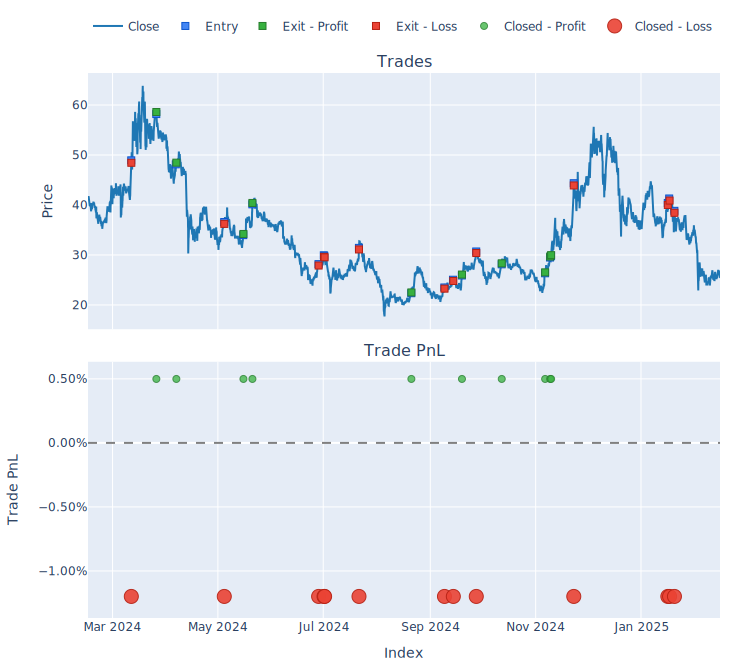

#########################
#########################
SUIUSDT 62.5%


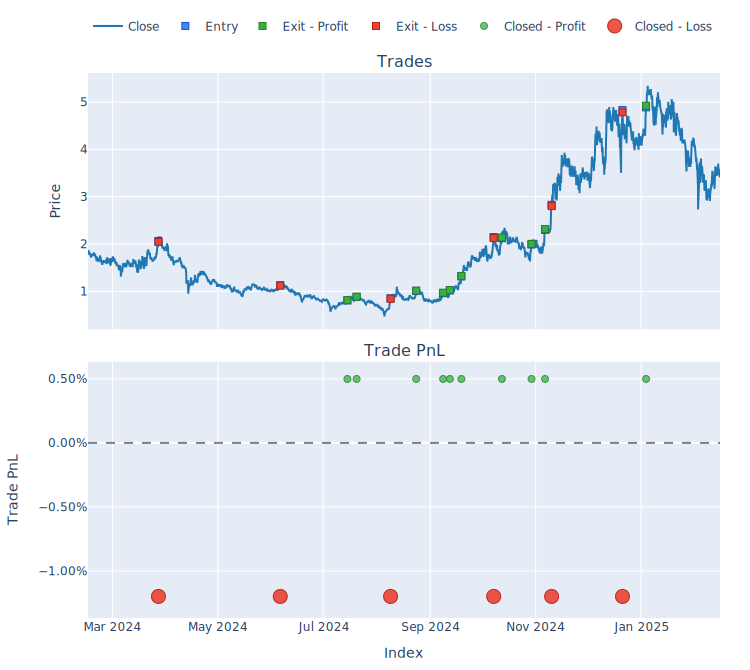

#########################
#########################
SHIBUSDT 57.89%


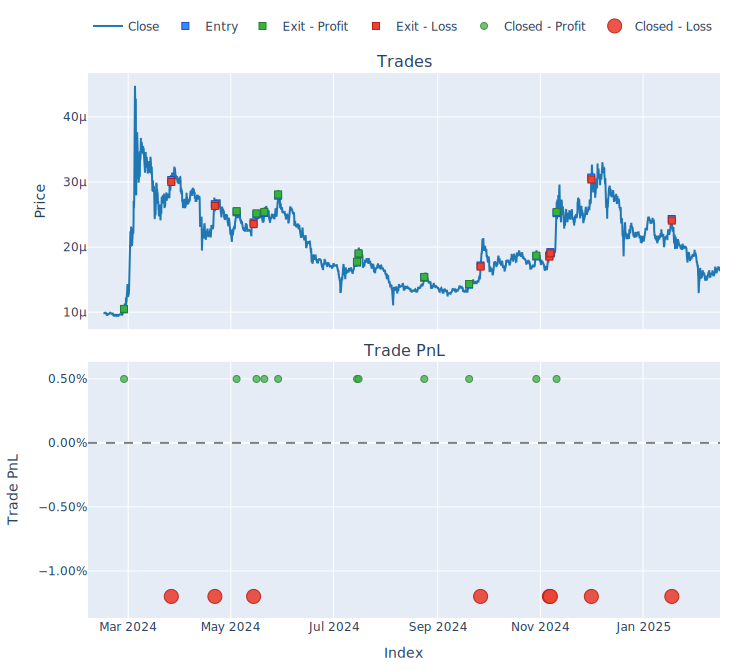

#########################
#########################
LTCUSDT 68.42%


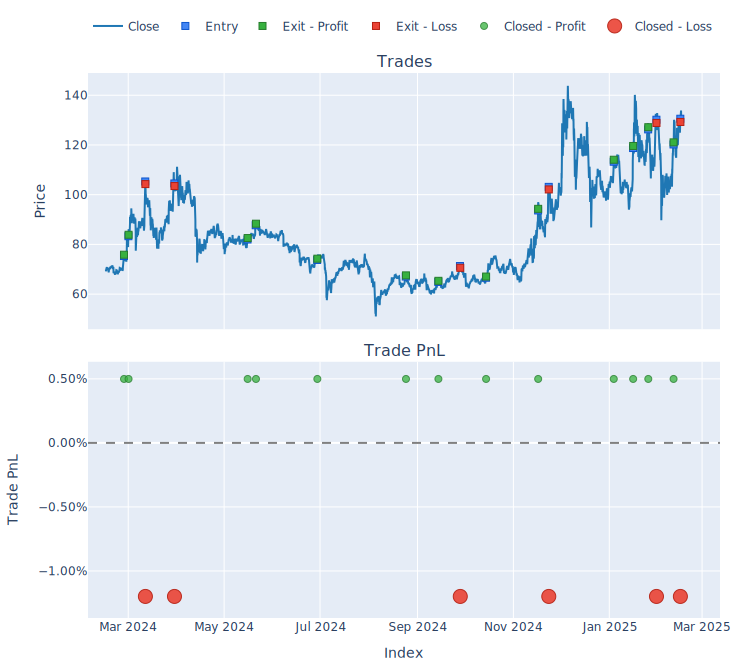

#########################
#########################
HBARUSDT 56.25%


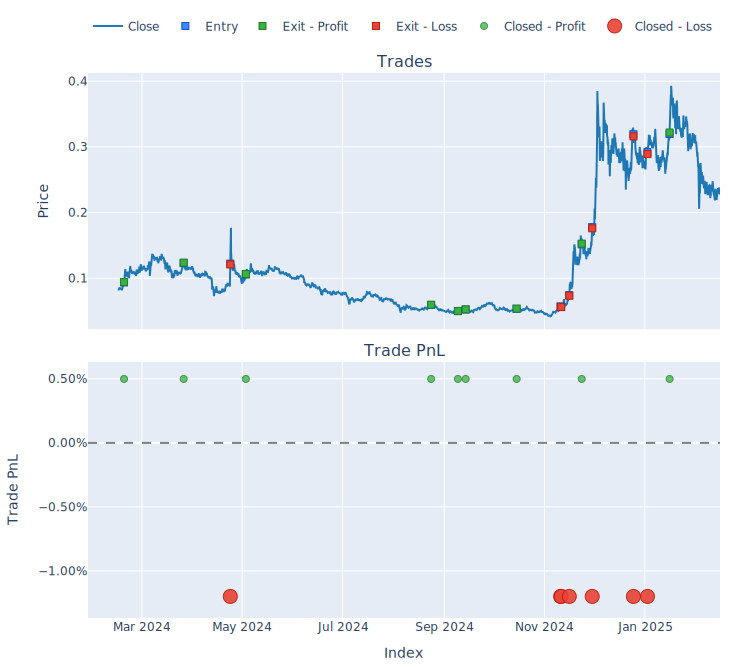

#########################
#########################
RENDERUSDT 70.0%


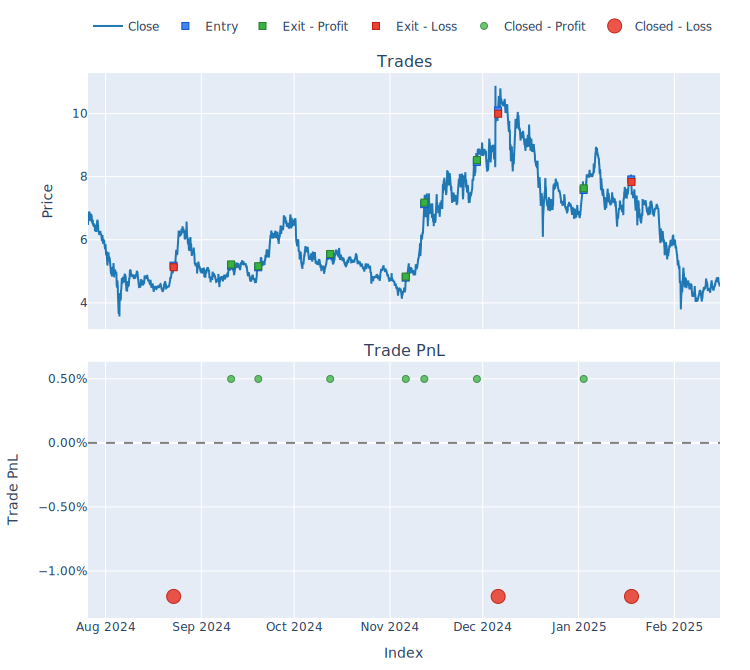

#########################
#########################
UNIUSDT 66.67%


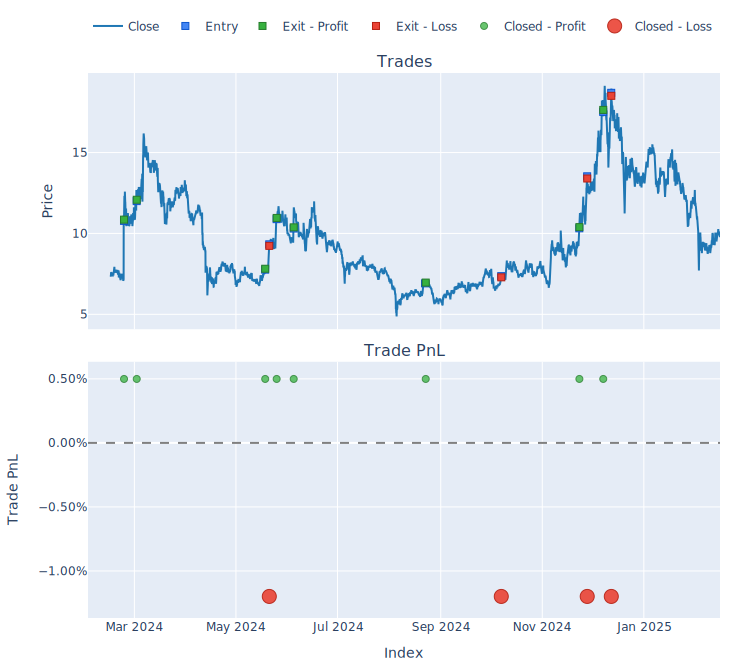

#########################


In [9]:
idxs = [0]
for idx in idxs:
   for symbol in symbols:
      pf = pf_dict[symbol].copy()
      print("#########################")
      # print(symbol)
      # pf[joined_best_df.index[idx]].plot_cum_returns().show_svg()
      win_rate = pf.trades[joined_best_df.index[idx]].win_rate()
      print(symbol, f"{round(win_rate*100, 2)}%")
      # print(symbol, pf.trades[joined_best_df.index[idx]].win_rate())
      pf.trades[joined_best_df.index[idx]].plots(settings=dict(plot_zones=False)).show_svg()
      # print(pf.trades[joined_best_df.index[idx]].win_rate())
      print("#########################")